# Part 1

In [1]:
from sklearn.linear_model import LinearRegression as lm
from  sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns


In [3]:
from google.colab import files
files.upload()

Saving boston_csv.csv to boston_csv (1).csv


{'boston_csv.csv': b'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV\r\n0.00632,18,2.31,0,0.538,6.575,NaN,4.09,1,296,15.3,396.9,4.98,24,0\r\n0.02731,0,7.07,0,na,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0\r\n0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1\r\n0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1\r\n0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2,1\r\n0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0\r\n0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9,0\r\n0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1,0\r\n0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5,0\r\n0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9,0\r\n0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15,0\r\n0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9,0\r\n0.09378,1

In [9]:
#Q5 1.	제공된 boston_csv.csv 파일을 사용하여 pandas 데이터 프레임 객체를 만든다, 결측치 코드인 na와 NaN이 모두 실제 결측치로 되도록 한다.  
bos = pd.read_csv("boston_csv.csv")
bos = bos.replace("na",np.nan)
bos = bos.replace("NaN",np.nan)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,NaN,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,NaN,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [10]:
#Q5 2.	이와 같은 결측치가 있는 관측치를 모두 제거한다.
bos = bos.dropna(axis=0, how='any')

In [11]:
bos
# 결측치 데이터를 포함한 4개의 관측치 제거됨.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.1,17.5,0
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0


In [12]:
#Q6 1.describe 메소드를 적용해서 각 변수별 요약 통계를 구한다.
bos.describe()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV,CAT. MEDV
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,3.641708,11.418327,11.163765,0.069721,6.284805,68.514542,3.797274,9.605578,409.095618,18.456574,356.353506,22.564343,0.167331
std,8.629979,23.396912,6.873538,0.254930,0.705085,28.247125,2.111828,8.717100,168.859125,2.165559,91.587527,9.217580,0.373643
min,0.009060,0.000000,0.460000,0.000000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,5.000000,0.000000
25%,0.082492,0.000000,5.190000,0.000000,5.884250,44.550000,2.091150,4.000000,279.250000,17.400000,375.240000,17.100000,0.000000
50%,0.262660,0.000000,9.690000,0.000000,6.208500,77.150000,3.207450,5.000000,330.000000,19.050000,391.340000,21.200000,0.000000
75%,3.689388,12.500000,18.100000,0.000000,6.628000,94.100000,5.213925,24.000000,666.000000,20.200000,396.120000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,50.000000,1.000000


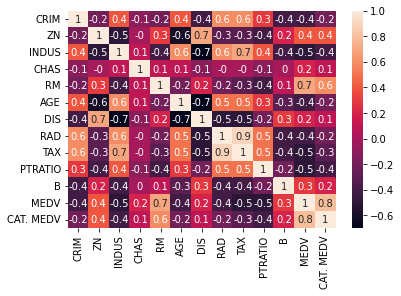

In [13]:
#Q6 2.	상관관계를 구한후 seaborn 라이브러리의 heatmap 을 구현한다.
correlation_matrix = bos.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [17]:
#Q7 
# 모집단의 하위계층의 비율(LSTAT)이 독립변수
X_LSTAT=np.array(bos["LSTAT"]).reshape((-1,1))
# 본인 소유의 주택가격(중앙값)인 MEDV가 종속변수 
Y_MEDV=np.array(bos["MEDV"]).reshape((-1,1))
# Training set이 표본의 75%를 차지한다.
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_LSTAT, Y_MEDV, test_size = 0.25, random_state = 3)
reg_1 = lm()
reg_1.fit(X_train_1, Y_train_1)
# X_train_1을 바탕으로 한 예측값을 Y_train_1_predict라는 변수에 저장.
Y_train_1_predict = reg_1.predict(X_train_1)

In [18]:
# Training set에 대한 회귀 분석 추정 계수
print(reg_1.coef_)
print(reg_1.intercept_) 

[[-0.9789119]]
[34.9919874]


In [19]:
# Training set에 대한 R제곱 값
r2_1 = r2_score(Y_train_1,Y_train_1_predict)
print(r2_1)

0.5394708106425741


In [20]:
# Training set에 대한 MSE 값
mse_1 = mean_squared_error(Y_train_1,Y_train_1_predict)
print(mse_1) 

41.117857183518886


In [21]:
# Test set에 대한 MSE 값
Y_test_1_predict = reg_1.predict(X_test_1)
print(mean_squared_error(Y_test_1,Y_test_1_predict))

29.565166011180708


In [24]:
#Q8
# 모집단의 하위계층의 비율(LSTAT)과 10,000 달러 당 재산세율(TAX)가  독립변수
X_LSTAT_TAX = np.array(bos[["LSTAT","TAX"]]).reshape((-1,2))
# 본인 소유의 주택가격(중앙값)인 MEDV가 종속변수. 따라서, 앞서 정의된 Y 라는 변수에 담긴 값 바꾸지 않음.
# Training set이 표본의 75%를 차지한다.
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_LSTAT_TAX, Y_MEDV, test_size = 0.25, random_state = 3)
reg_2 = lm()
reg_2.fit(X_train_2, Y_train_2)
# X_train_2를 바탕으로 한 예측값을 Y_train_2_predict라는 변수에 저장.
Y_train_2_predict = reg_2.predict(X_train_2)

In [25]:
# Training set에 대한 회귀 분석 추정 계수
print(reg_2.coef_)
print(reg_2.intercept_)

[[-0.89162835 -0.00683497]]
[36.6716777]


In [26]:
# Training set에 대한 R제곱 값
r2_2 = r2_score(Y_train_2, Y_train_2_predict)
print(r2_2)

0.5505131096156947


In [27]:
# Training set에 대한 MSE 값
mse_2 = mean_squared_error(Y_train_2,Y_train_2_predict)
print(mse_2)

40.131957304321205


In [28]:
# Test set에 대한 MSE 값
Y_test_2_predict = reg_2.predict(X_test_2)
print(mean_squared_error(Y_test_2,Y_test_2_predict))

30.328119505426734


# Part 2

In [29]:
from google.colab import files
files.upload()

Saving wine_data.csv to wine_data.csv


{'wine_data.csv': b'Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline\r\n1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065\r\n1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050\r\n1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185\r\n1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480\r\n1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735\r\n1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450\r\n1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290\r\n1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295\r\n1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045\r\n1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045\r\n1,14.1,2.16,2.3,18,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510\r\n1,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5,1.17,2.82,12

In [30]:
#Pandas를 사용해 wine_data.csv파일을 wine 데이터프레임을 만든다.
wine = pd.read_csv("wine_data.csv")
wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [31]:
#Wine 데이터에 describe 메소드를 사용하여 요약통계량을 구한다.
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [32]:
#주어진 데이터에 첫 변수 class를 우리가 예측하는 타겟 변수, y, 나머지 모든 변수를 예측 변수 X로 활용
X_wine = wine.drop('Class',axis=1)
X_wine = np.array(X_wine).reshape((-1,13))
Y_wine = wine['Class']
Y_wine = np.array(Y_wine).reshape((-1,1))


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Train/Test 표본을 70% 와 30%가 되도록 데이터를 구성한다. 각각의 명칭은 X_train/X_test, y_train/y_test로 칭한다. 
X_train, X_test, Y_train, Y_test = train_test_split(X_wine, Y_wine, test_size = 0.3, random_state = 30)
# KNEighborsClassifier를 k=5로 결정하고 다수결 및 유클리디안 거리를 사용한다.
knn_1 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
# Scikit-learn의 KNeighborsClassifier를 사용하여 70%인 X_train과 y_train을 바탕으로 모형을 트레이닝 시킨다.  
knn_1.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [34]:
# 이 Training 된 모형을 바탕으로 Training Set에서 예측해보고 원래의 라벨을 얼마나 정확하게 예측하는지 percentage 단위로 출력
pred_train_1 = knn_1.predict(X_train)
print("confusion matrix 값")
print(confusion_matrix(Y_train, pred_train_1))
print(end="\n\n")
print("accuracy score 값")
print(accuracy_score(Y_train, pred_train_1))
print(end="\n\n")
print("classification report 값")
print(classification_report(Y_train, pred_train_1))

confusion matrix 값
[[37  1  3]
 [ 4 41  3]
 [ 0 14 21]]


accuracy score 값
0.7983870967741935


classification report 값
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        41
           2       0.73      0.85      0.79        48
           3       0.78      0.60      0.68        35

    accuracy                           0.80       124
   macro avg       0.80      0.79      0.79       124
weighted avg       0.80      0.80      0.79       124



In [35]:
# 이 Training 된 모형을 바탕으로 Test Set에서 원래의 라벨을 얼마나 정확하게 예측하는지 percentage 단위로 출력한다.
pred_test_1 = knn_1.predict(X_test)
print("confusion matrix 값")
print(confusion_matrix(Y_test, pred_test_1))
print(end="\n\n")
print("accuracy score 값")
print(accuracy_score(Y_test, pred_test_1))
print(end="\n\n")
print("classification report 값")
print(classification_report(Y_test, pred_test_1))

confusion matrix 값
[[14  1  3]
 [ 1 15  7]
 [ 0  6  7]]


accuracy score 값
0.6666666666666666


classification report 값
              precision    recall  f1-score   support

           1       0.93      0.78      0.85        18
           2       0.68      0.65      0.67        23
           3       0.41      0.54      0.47        13

    accuracy                           0.67        54
   macro avg       0.68      0.66      0.66        54
weighted avg       0.70      0.67      0.68        54



In [36]:
# 5-6번을 k=3일 경우에 대해서도 시행한다. 
knn_2 = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn_2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [37]:
# 이 Training 된 모형을 바탕으로 Training Set에서 예측해보고 원래의 라벨을 얼마나 정확하게 예측하는지 percentage 단위로 출력
pred_train_2 = knn_2.predict(X_train)
print("confusion matrix 값")
print(confusion_matrix(Y_train, pred_train_2))
print(end="\n\n")
print("accuracy score 값")
print(accuracy_score(Y_train, pred_train_2))
print(end="\n\n")
print("classification report 값")
print(classification_report(Y_train, pred_train_2))

confusion matrix 값
[[39  0  2]
 [ 4 41  3]
 [ 2  6 27]]


accuracy score 값
0.8629032258064516


classification report 값
              precision    recall  f1-score   support

           1       0.87      0.95      0.91        41
           2       0.87      0.85      0.86        48
           3       0.84      0.77      0.81        35

    accuracy                           0.86       124
   macro avg       0.86      0.86      0.86       124
weighted avg       0.86      0.86      0.86       124



In [38]:
# 이 Training 된 모형을 바탕으로 Test Set에서 원래의 라벨을 얼마나 정확하게 예측하는지 percentage 단위로 출력한다.
pred_test_2 = knn_2.predict(X_test)
print("confusion matrix 값")
print(confusion_matrix(Y_test, pred_test_2))
print(end="\n\n")
print("accuracy score 값")
print(accuracy_score(Y_test, pred_test_2))
print(end="\n\n")
print("classification report 값")
print(classification_report(Y_test, pred_test_2))

confusion matrix 값
[[15  1  2]
 [ 1 14  8]
 [ 2  4  7]]


accuracy score 값
0.6666666666666666


classification report 값
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        18
           2       0.74      0.61      0.67        23
           3       0.41      0.54      0.47        13

    accuracy                           0.67        54
   macro avg       0.66      0.66      0.66        54
weighted avg       0.69      0.67      0.67        54



In [39]:
# 3-6번에서 X 데이터를 Alchol, Malic acid, Ash, Alcalinity of ash 네 변수만 활용하여 다시 수행한다.
X_wine = wine[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash']]
X_wine = np.array(X_wine).reshape((-1,4))
Y_wine = wine['Class']
Y_wine = np.array(Y_wine).reshape((-1,1))
# Train/Test 표본을 70% 와 30%가 되도록 데이터를 구성한다. 각각의 명칭은 X_train/X_test, y_train/y_test로 칭한다. 
X_train, X_test, Y_train, Y_test = train_test_split(X_wine, Y_wine, test_size = 0.3, random_state = 30)
# KNEighborsClassifier를 k=5로 결정하고 다수결 및 유클리디안 거리를 사용한다.
knn_3 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
# Scikit-learn의 KNeighborsClassifier를 사용하여 70%인 X_train과 y_train을 바탕으로 모형을 트레이닝 시킨다.  
knn_3.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [40]:
# 이 Training 된 모형을 바탕으로 Training Set에서 예측해보고 원래의 라벨을 얼마나 정확하게 예측하는지 percentage 단위로 출력
pred_train_3 = knn_3.predict(X_train)
print("confusion matrix 값")
print(confusion_matrix(Y_train, pred_train_3))
print(end="\n\n")
print("accuracy score 값")
print(accuracy_score(Y_train, pred_train_3))
print(end="\n\n")
print("classification report 값")
print(classification_report(Y_train, pred_train_3))

confusion matrix 값
[[37  2  2]
 [ 3 37  8]
 [ 2  3 30]]


accuracy score 값
0.8387096774193549


classification report 값
              precision    recall  f1-score   support

           1       0.88      0.90      0.89        41
           2       0.88      0.77      0.82        48
           3       0.75      0.86      0.80        35

    accuracy                           0.84       124
   macro avg       0.84      0.84      0.84       124
weighted avg       0.84      0.84      0.84       124



In [41]:
# 이 Training 된 모형을 바탕으로 Test Set에서 원래의 라벨을 얼마나 정확하게 예측하는지 percentage 단위로 출력한다.
pred_test_3 = knn_3.predict(X_test)
print("confusion matrix 값")
print(confusion_matrix(Y_test, pred_test_3))
print(end="\n\n")
print("accuracy score 값")
print(accuracy_score(Y_test, pred_test_3))
print(end="\n\n")
print("classification report 값")
print(classification_report(Y_test, pred_test_3))

confusion matrix 값
[[16  1  1]
 [ 2 16  5]
 [ 0  2 11]]


accuracy score 값
0.7962962962962963


classification report 값
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        18
           2       0.84      0.70      0.76        23
           3       0.65      0.85      0.73        13

    accuracy                           0.80        54
   macro avg       0.79      0.81      0.79        54
weighted avg       0.81      0.80      0.80        54

